In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Part 1: Visualization with Matplotlib and Seaborn

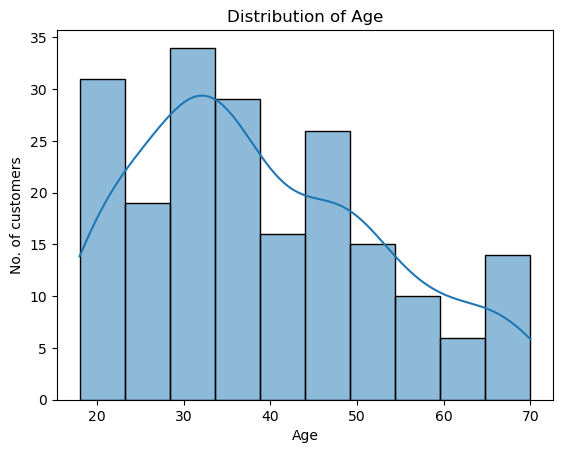

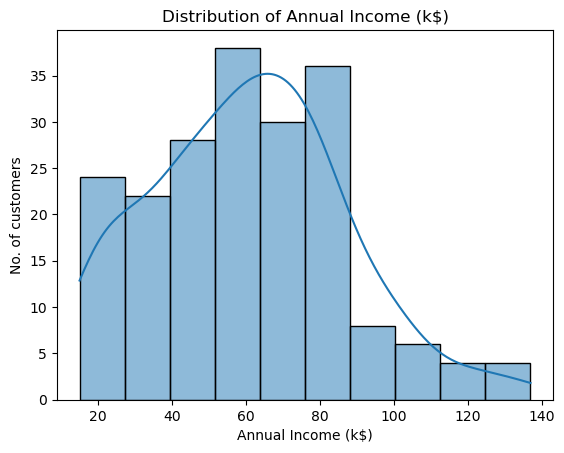

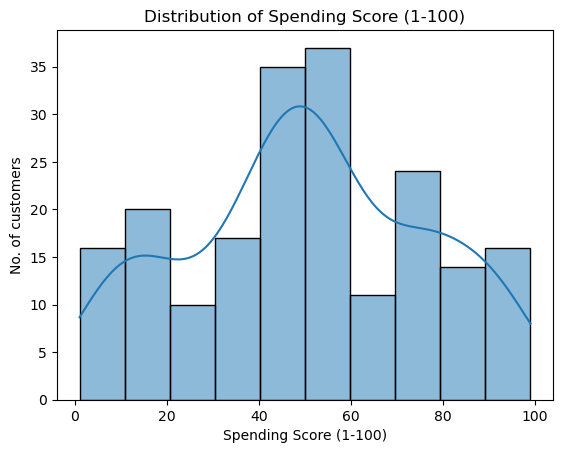

In [25]:
df=pd.read_csv('customers_dataset.csv')

numeric_cols = df.select_dtypes(include='number').columns[1:]
for col in numeric_cols:
    sns.histplot(data=df, x=df[col], bins=10,kde=True) 
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('No. of customers')
    plt.show()

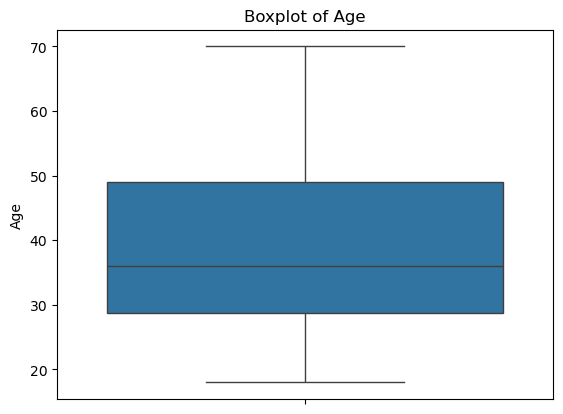

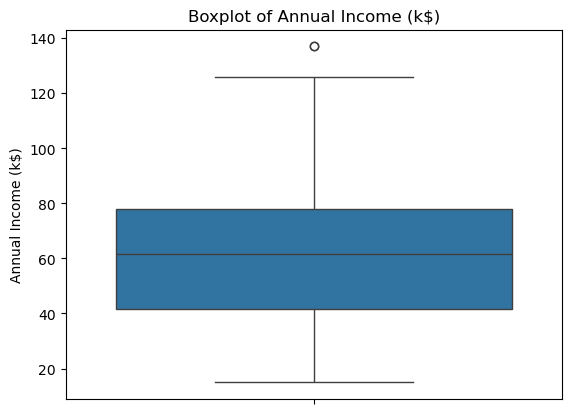

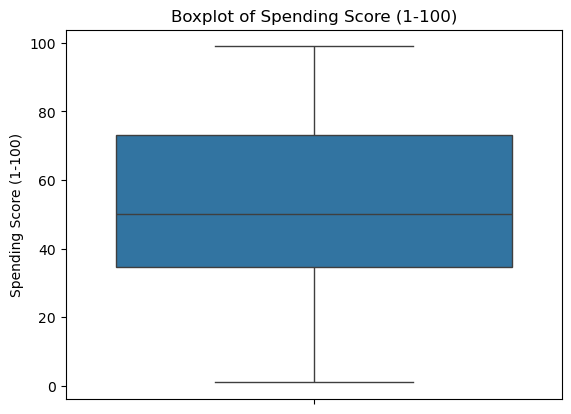

In [26]:
numeric_cols = df.select_dtypes(include='number').columns[1:]
for col in numeric_cols:
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

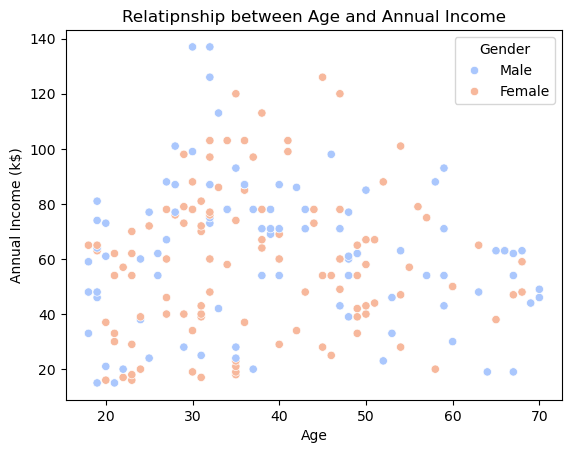

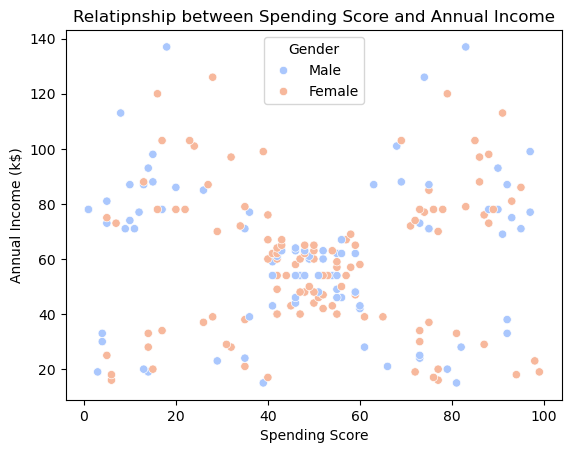

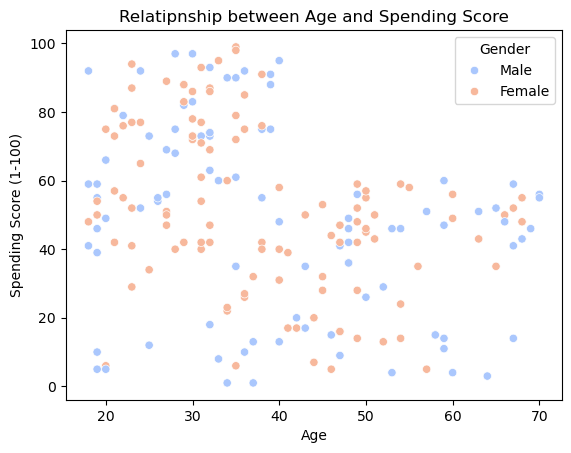

In [27]:

sns.scatterplot(data=df, x='Age',y='Annual Income (k$)',hue='Gender', palette='coolwarm') 
plt.title('Relatipnship between Age and Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

sns.scatterplot(data=df, x='Spending Score (1-100)',y='Annual Income (k$)',hue='Gender', palette='coolwarm') 
plt.title('Relatipnship between Spending Score and Annual Income')
plt.xlabel('Spending Score')
plt.ylabel('Annual Income (k$)')
plt.show()

sns.scatterplot(data=df, x='Age',y='Spending Score (1-100)',hue='Gender', palette='coolwarm') 
plt.title('Relatipnship between Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

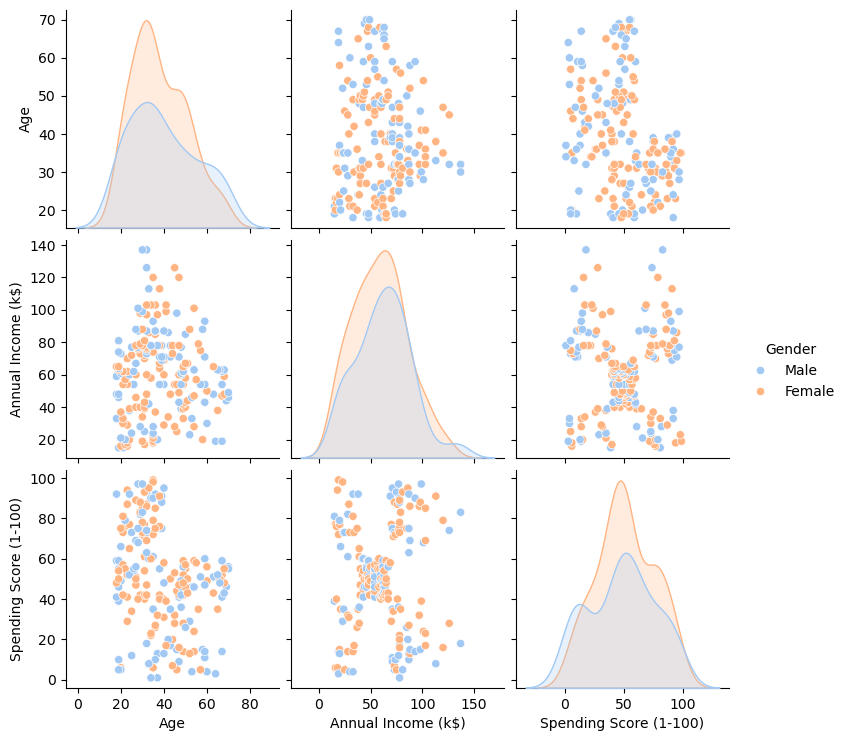

In [29]:
df_subset = df.drop(columns=['CustomerID'])
sns.pairplot(df_subset,hue = 'Gender', palette= 'pastel')
plt.show()

# Part 2: Skewness and Normalization

In [30]:
numeric_cols = df.select_dtypes(include='number').columns[1:]
for col in numeric_cols:
    if df[col].skew()>0.05:
        print(f'skewness={df[col].skew()}, {col} distribution is right skewed')
    elif df[col].skew()<-0.05:
        print(f'skewness={df[col].skew()}, {col} distribution is left skewed')
    else:
        print(f'skewness={df[col].skew()}, {col} distribution is normal i.e. zero skewness')

skewness=0.48556885096681657, Age distribution is right skewed
skewness=0.3218425498619055, Annual Income (k$) distribution is right skewed
skewness=-0.047220201374263374, Spending Score (1-100) distribution is normal i.e. zero skewness


In [31]:
cols = ['Age','Annual Income (k$)']
transformed_data = df[cols].apply(lambda x: np.log(x + 1))
df_transformed = pd.DataFrame(transformed_data, columns=cols)
df_final = pd.concat([df.drop(columns=cols), df_transformed], axis=1)
df_final.to_csv('log_transformed_data.csv', index=False)
for col in cols:
    print(col)
    print("Original Mean and Std:", df[col].mean(), df[col].std())
    print("After log transformation:", df_final[col].mean(), df_final[col].std())
    print("Original skewness:", df[col].skew())
    print("Log transformed skewness:", df_final[col].skew())

Age
Original Mean and Std: 38.85 13.969007331558883
After log transformation: 3.623080371378513 0.35662930335922716
Original skewness: 0.48556885096681657
Log transformed skewness: -0.0894906016890439
Annual Income (k$)
Original Mean and Std: 60.56 26.264721165271254
After log transformation: 4.012388962976807 0.4951010750719503
Original skewness: 0.3218425498619055
Log transformed skewness: -0.7359971613306433


In [32]:
cols = ['Age','Annual Income (k$)']
transformed_data = df[cols].apply(lambda x: np.sqrt(x))
df_transformed = pd.DataFrame(transformed_data, columns=cols)
df_final = pd.concat([df.drop(columns=cols), df_transformed], axis=1)
df_final.to_csv('squareRoot_transformed_data.csv', index=False)
for col in cols:
    print(col)
    print("Original Mean and Std:", df[col].mean(), df[col].std())
    print("After squareroot transformation:", df_final[col].mean(), df_final[col].std())
    print("Original skewness:", df[col].skew())
    print("Square root transformed skewness:", df_final[col].skew())

Age
Original Mean and Std: 38.85 13.969007331558883
After squareroot transformation: 6.133051886457322 1.114398482550945
Original skewness: 0.48556885096681657
Square root transformed skewness: 0.195059160132557
Annual Income (k$)
Original Mean and Std: 60.56 26.264721165271254
After squareroot transformation: 7.581243231179371 1.760753341997041
Original skewness: 0.3218425498619055
Square root transformed skewness: -0.23028952579486217


In [33]:
cols = ['Age','Annual Income (k$)']
df_boxcox = df.copy()
for col in cols:
    df_boxcox[col], _ = boxcox(df[col])

df_transformed = pd.DataFrame(df_boxcox, columns=cols)
df_final = pd.concat([df.drop(columns=cols), df_transformed], axis=1)
df_final.to_csv('box_cox_transformed_data.csv', index=False)
for col in cols:
    print(col)
    print("Original Mean and Std:", df[col].mean(), df[col].std())
    print("After boxcox transformation:", df_final[col].mean(), df_final[col].std())
    print("Original skewness:", df[col].skew())
    print("boxcox transformed skewness:", df_final[col].skew())

Age
Original Mean and Std: 38.85 13.969007331558883
After boxcox transformation: 4.763488863220765 0.6243794369670156
Original skewness: 0.48556885096681657
boxcox transformed skewness: -0.016453116644575785
Annual Income (k$)
Original Mean and Std: 60.56 26.264721165271254
After boxcox transformation: 20.125687967685725 6.395290147036389
Original skewness: 0.3218425498619055
boxcox transformed skewness: -0.06640145669228965


In [34]:
cols_to_scale = ['Age', 'Annual Income (k$)']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[cols_to_scale])
df_scaled = pd.DataFrame(scaled_data, columns=cols_to_scale)
df_final = pd.concat([df.drop(columns=cols_to_scale), df_scaled], axis=1)
df_final.to_csv('standard_scaled_data.csv', index=False)
for col in cols_to_scale:
    print(col)
    print("Original Mean and Std:", df[col].mean(), df[col].std())
    print("After standard scaling:", df_final[col].mean(), df_final[col].std())
    print("Original skewness:", df[col].skew())
    print("standard scaled skewness:", df_final[col].skew())

Age
Original Mean and Std: 38.85 13.969007331558883
After standard scaling: -1.021405182655144e-16 1.002509414234171
Original skewness: 0.48556885096681657
standard scaled skewness: 0.4855688509668167
Annual Income (k$)
Original Mean and Std: 60.56 26.264721165271254
After standard scaling: -2.1316282072803005e-16 1.0025094142341713
Original skewness: 0.3218425498619055
standard scaled skewness: 0.3218425498619062


In [35]:
cols_to_scale = ['Age', 'Annual Income (k$)']

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[cols_to_scale])
df_scaled = pd.DataFrame(scaled_data, columns=cols_to_scale)
df_final = pd.concat([df.drop(columns=cols_to_scale), df_scaled], axis=1)
df_final.to_csv('MinMax_scaled_data.csv', index=False)
for col in cols:
    print(col)
    print("Original Mean and Std:", df[col].mean(), df[col].std())
    print("After minmax scaling:", df_final[col].mean(), df_final[col].std())
    print("Original skewness:", df[col].skew())
    print("MinMax scaled skewness:", df_final[col].skew())

Age
Original Mean and Std: 38.85 13.969007331558883
After minmax scaling: 0.40096153846153854 0.2686347563761323
Original skewness: 0.48556885096681657
MinMax scaled skewness: 0.4855688509668167
Annual Income (k$)
Original Mean and Std: 60.56 26.264721165271254
After minmax scaling: 0.3734426229508197 0.21528459971533798
Original skewness: 0.3218425498619055
MinMax scaled skewness: 0.32184254986190536


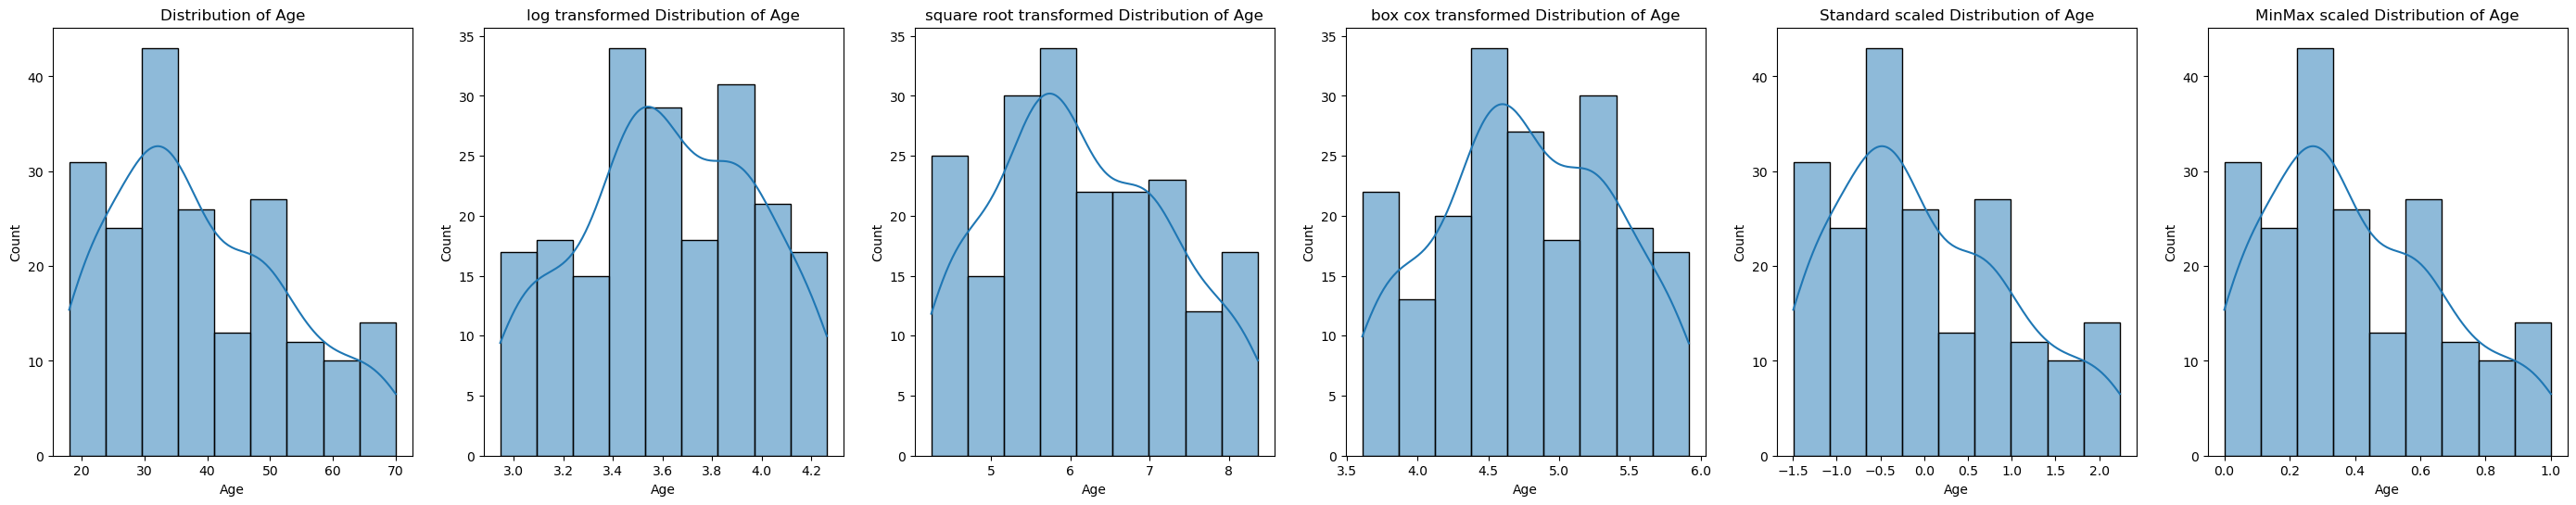

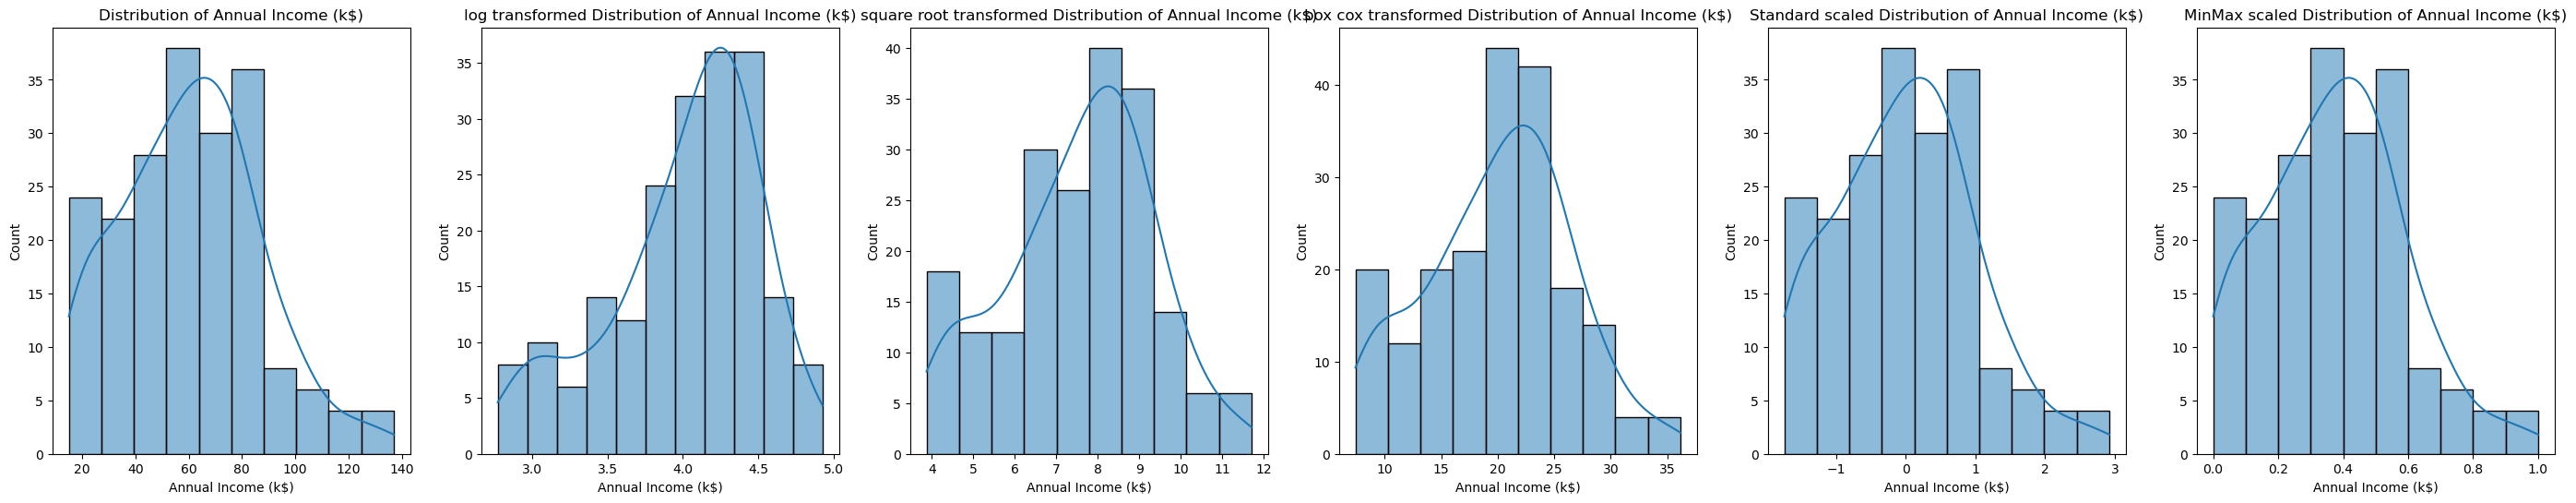

In [36]:
df=pd.read_csv('customers_dataset.csv')
df_log=pd.read_csv('log_transformed_data.csv')
df_squareRoot=pd.read_csv('squareRoot_transformed_data.csv')
df_boxcox=pd.read_csv('box_cox_transformed_data.csv')
df_standardscaled=pd.read_csv('standard_scaled_data.csv')
df_minmax=pd.read_csv('MinMax_scaled_data.csv')

cols = ['Age','Annual Income (k$)']
for col in cols:
    fig, [ax1,ax2,ax3,ax4,ax5,ax6] = plt.subplots(figsize=(35,6),ncols=6,nrows=1)
    sns.histplot(data=df, x=col,ax=ax1,kde=True)
    sns.histplot(data=df_log, x=col,ax=ax2,kde=True)
    sns.histplot(data=df_squareRoot, x=col,ax=ax3,kde=True)
    sns.histplot(data=df_boxcox, x=col,ax=ax4,kde=True)
    sns.histplot(data=df_standardscaled, x=col,ax=ax5,kde=True)
    sns.histplot(data=df_minmax, x=col,ax=ax6,kde=True)
    ax1.set_title(f'Distribution of {col}')
    ax2.set_title(f'log transformed Distribution of {col}')
    ax3.set_title(f'square root transformed Distribution of {col}')
    ax4.set_title(f'box cox transformed Distribution of {col}')
    ax5.set_title(f'Standard scaled Distribution of {col}')
    ax6.set_title(f'MinMax scaled Distribution of {col}')

# Part 3: Clustering with K-Means

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known

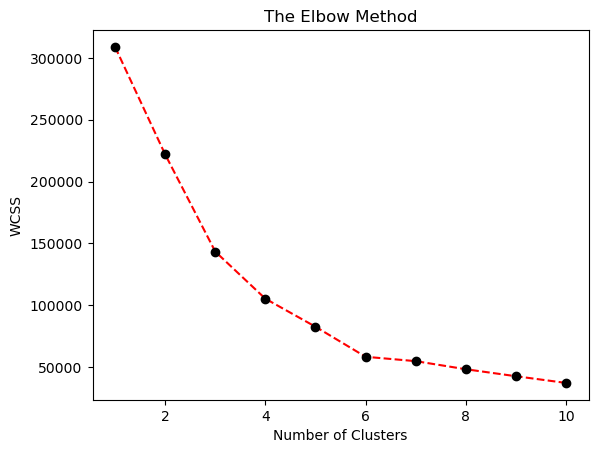

In [37]:
num_data = df.select_dtypes(include = 'number')
df_subset = num_data.drop(columns=['CustomerID'])
wcss = []
for k in range(1,11):
  wcss.append(KMeans(n_clusters = k,init = 'k-means++',random_state = 40).fit(df_subset).inertia_)
plt.plot(range(1,11),wcss,marker = 'o',linestyle = '--',color = 'red',mfc = 'black',mec = 'k')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


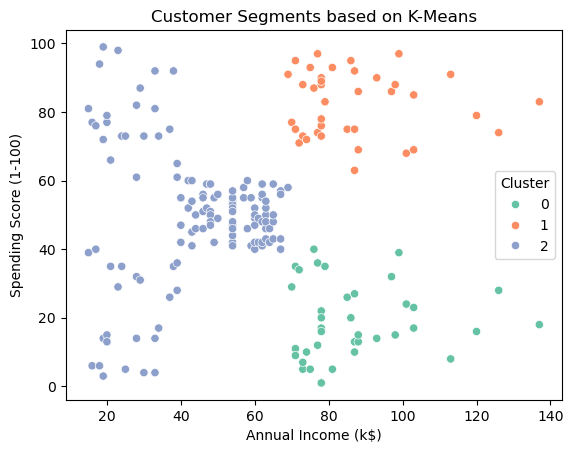

In [38]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_subset)
labels = kmeans.labels_
df['Cluster'] = labels
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2')
plt.title("Customer Segments based on K-Means")
plt.show()

Cluster 0: These customers have high income but spend very little, indicating they may be price-conscious or prefer saving.
Cluster 1: Moderate income and spending—balanced group.
Cluster 2: Lower income but higher spending—could be impulse buyers or more brand-driven.

In [39]:
print(kmeans.cluster_centers_)

[[40.39473684 87.         18.63157895]
 [32.69230769 86.53846154 82.12820513]
 [40.32520325 44.15447154 49.82926829]]
